### Importación de datos



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [1]:
def facturacion(tienda):
  df = pd.read_csv(tienda)
  df['ingreso'] = df['Precio']
  ingresoTotal = df['ingreso'].sum()
  return ingresoTotal

La ganancia de la tienda 1 es de $ 1150880400.0
La ganancia de la tienda 2 es de $ 1116343500.0
La ganancia de la tienda 3 es de $ 1098019600.0
La ganancia de la tienda 4 es de $ 1038375700.0


Text(0.5, 1.0, 'Porcentaje de ganancia por tienda')

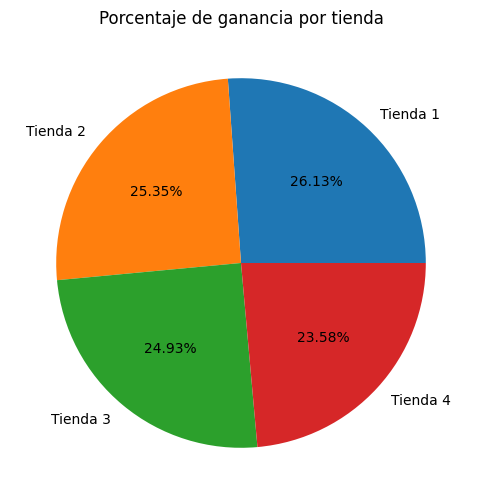

In [14]:
ingresoT1 = facturacion(url)
ingresoT2 = facturacion(url2)
ingresoT3 = facturacion(url3)
ingresoT4 = facturacion(url4)

ingresoTotal = [ingresoT1,ingresoT2,ingresoT3,ingresoT4]
tiendas = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']

for i in range(len(tiendas)):
  print(f"La ganancia de la tienda {i+1} es de $ {(ingresoTotal[i])}")

plt.figure(figsize=(6,6))
plt.pie(ingresoTotal,labels=tiendas,autopct='%1.2f%%')
plt.title('Porcentaje de ganancia por tienda')

# 2. Ventas por categoría

In [19]:
def ventas(tienda,numero):
  df = pd.read_csv(tienda)
  df['ganancia'] = df['Precio']-df['Costo de envío']
  ventas = df.groupby('Categoría del Producto')['ganancia'].sum()
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.bar(ventas.index, ventas.values, color='skyblue')
  ax.set_title(f'Ventas por Categoría, tienda {numero}')
  ax.set_xlabel('Categoría del Producto')
  ax.set_ylabel('Venta Total')
  ax.tick_params(axis='x', rotation=45)
  plt.tight_layout()

  return fig
#
def ventasCategoria(tienda,numero):
  df = pd.read_csv(tienda)
  cantidadVentas = df['Categoría del Producto'].value_counts()
  fig, ax = plt.subplots(figsize=(8, 4))
  ax.bar(cantidadVentas.index, cantidadVentas.values, color='skyblue')
  ax.set_title(f'Cantidad de Ventas por Categoría, tienda {numero}')
  ax.set_xlabel('Categoría del Producto')
  ax.set_ylabel('Cantidad Total')
  ax.tick_params(axis='x', rotation=45)
  plt.tight_layout()

  return fig


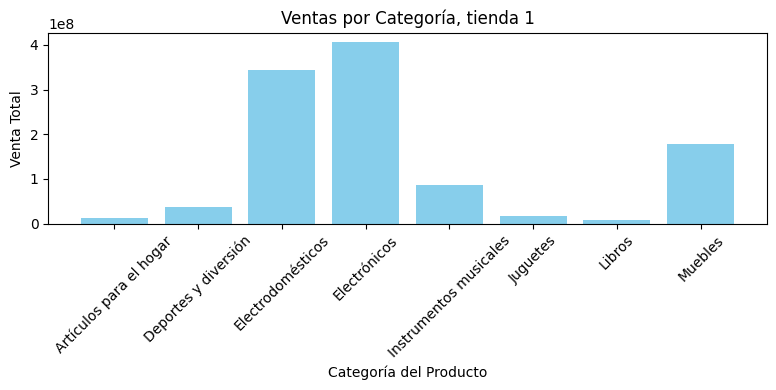

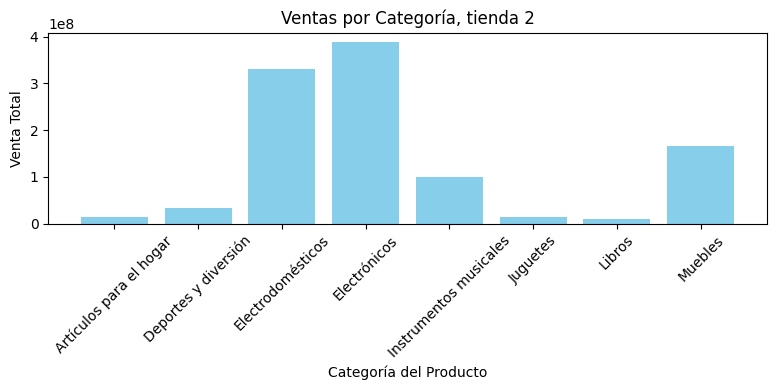

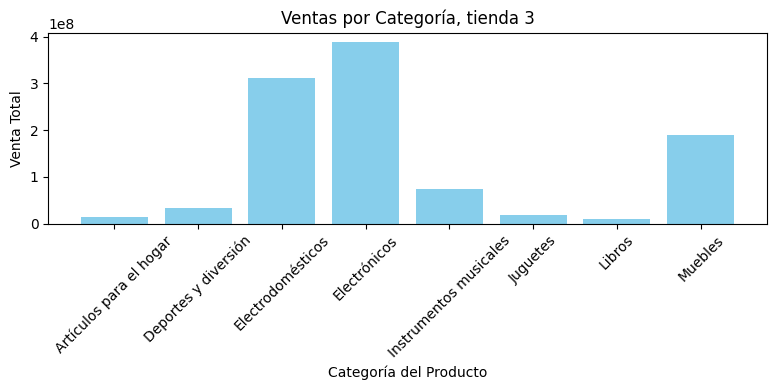

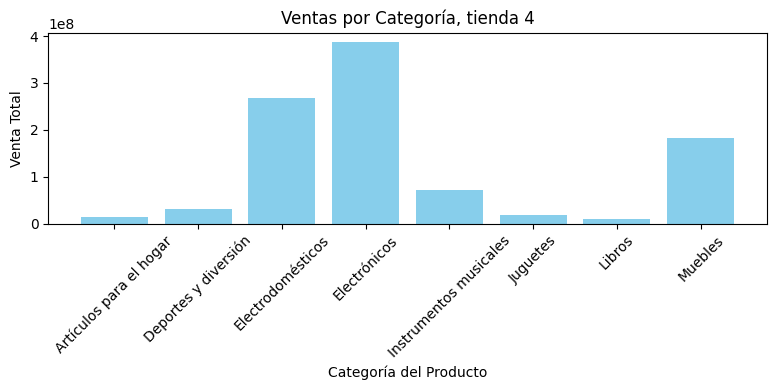

In [20]:
ventasT1 = ventas(url,'1')
ventasT2 = ventas(url2,'2')
ventasT3 = ventas(url3,'3')
ventasT4 = ventas(url4,'4')



# 3. Calificación promedio de la tienda


In [23]:
def calificacion(tienda):
  df = pd.read_csv(tienda)
  promedio = df['Calificación'].mean()
  return promedio


In [24]:

def graficoBarraH(tiendas, valores, titulo, etiqueta_x, etiqueta_y,a,b):
    plt.figure(figsize=(a, b))
    plt.barh(tiendas, valores, color='skyblue')
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.tight_layout()
    plt.show()

In [27]:
calificacionT1 = calificacion(url)
calificacionT2 = calificacion(url2)
calificacionT3 = calificacion(url3)
calificacionT4 = calificacion(url4)
calificacionTotal = [calificacionT1,calificacionT2,calificacionT3,calificacionT4]
for i in range(len(tiendas)):
  print(f"La calificación de la tienda {i+1} es de {round(calificacionTotal[i],2)}")




La calificación de la tienda 1 es de 3.98
La calificación de la tienda 2 es de 4.04
La calificación de la tienda 3 es de 4.05
La calificación de la tienda 4 es de 4.0


# 4. Productos más y menos vendidos

In [28]:
def productos(tienda):
  df = pd.read_csv(tienda)
  contador = df['Producto'].value_counts()
  return contador

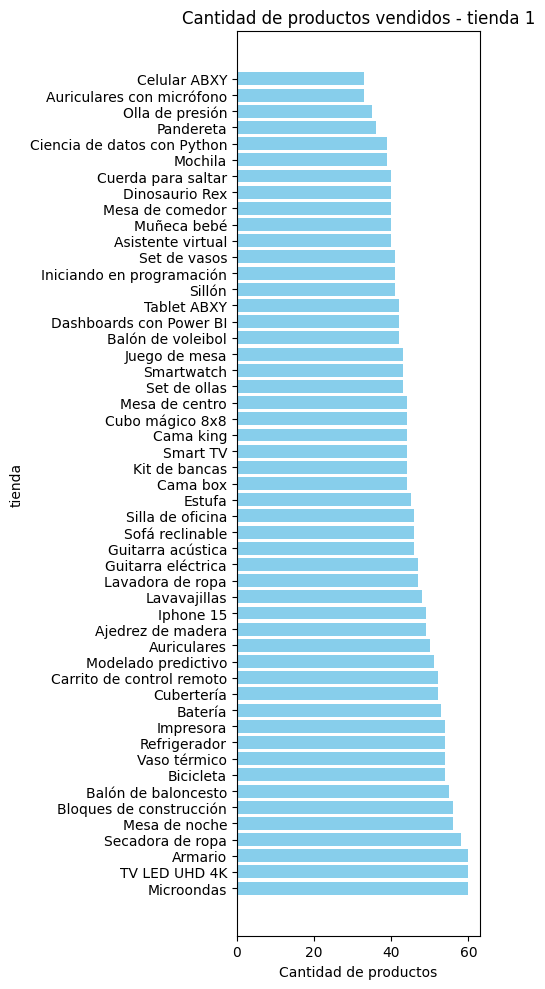

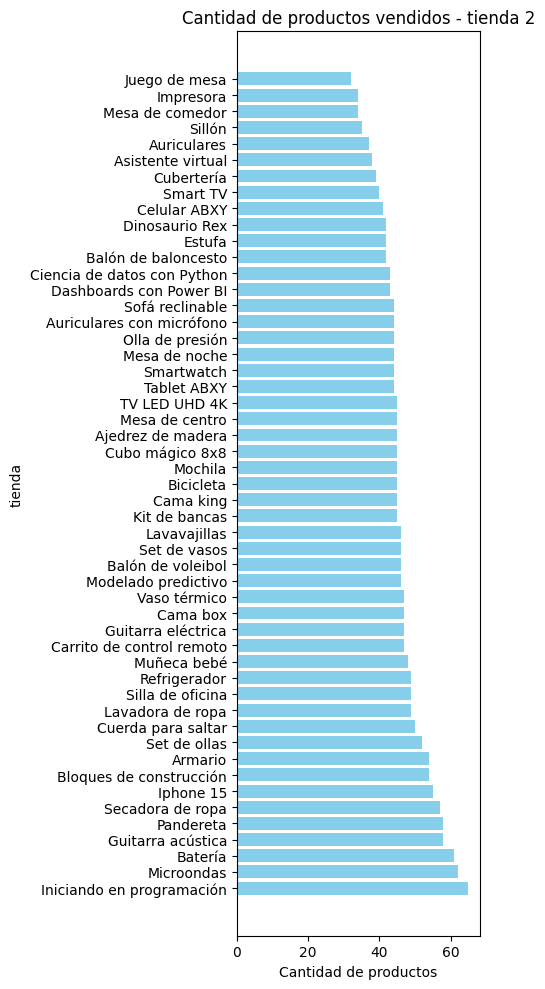

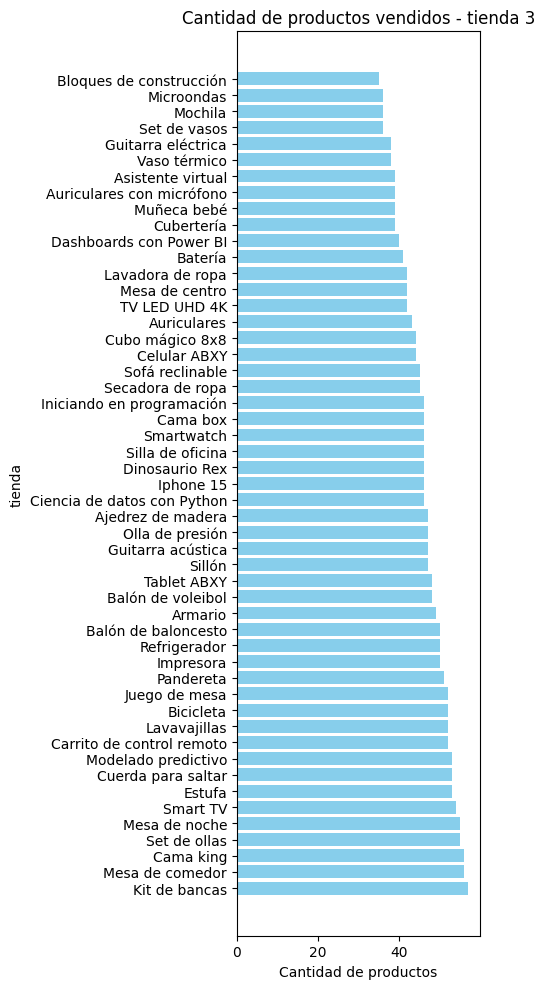

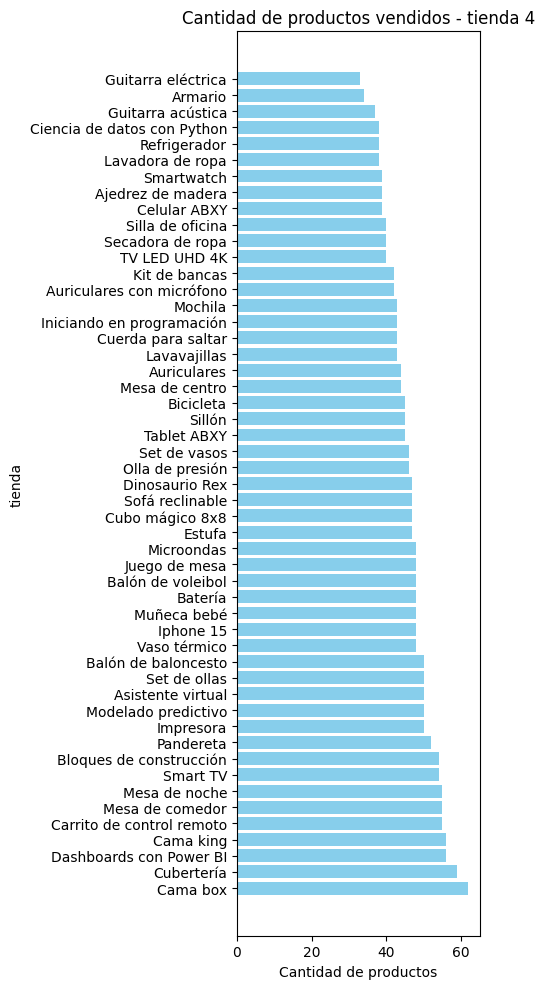

In [29]:
cantProductosT1 = productos(url)
cantProductosT2 = productos(url2)
cantProductosT3 = productos(url3)
cantProductosT4 = productos(url4)
graficoBarraH(cantProductosT1.index,cantProductosT1.values,'Cantidad de productos vendidos - tienda 1','Cantidad de productos','tienda',5,10)
graficoBarraH(cantProductosT2.index,cantProductosT2.values,'Cantidad de productos vendidos - tienda 2','Cantidad de productos','tienda',5,10)
graficoBarraH(cantProductosT3.index,cantProductosT3.values,'Cantidad de productos vendidos - tienda 3','Cantidad de productos','tienda',5,10)
graficoBarraH(cantProductosT4.index,cantProductosT4.values,'Cantidad de productos vendidos - tienda 4','Cantidad de productos','tienda',5,10)

# 5. Envío promedio por tienda

In [30]:
def promedio(tienda):
  df = pd.read_csv(tienda)
  promedio = round(df['Costo de envío'].mean(),2)
  return promedio

In [36]:
print(f'El costo del envío promedio de la tienda 1 es de {promedio(url)}\n'
      f'El envío promedio de la tienda 2 es de {promedio(url2)}\n'
      f'El envío promedio de la tienda 3 es de {promedio(url3)}\n'
      f'El envío promedio de la tienda 4 es de {promedio(url4)}')

El costo del envío promedio de la tienda 1 es de 26018.61
El envío promedio de la tienda 2 es de 25216.24
El envío promedio de la tienda 3 es de 24805.68
El envío promedio de la tienda 4 es de 23459.46


In [39]:
data = {
    "Tienda 1": [4, 1, 1],
    "Tienda 2": [3, 3, 2],
    "Tienda 3": [2, 4, 3],
    "Tienda 4": [1, 2, 4]
}

criterios = ["Ganancia", "Calificación", "Costo de envío"]
tabla = pd.DataFrame(data, index=criterios)
tabla.loc["Total"] = tabla.sum()


# 6. Analisis de las tiendas

#📉 Informe de Evaluación para Cierre de Tienda por Bajo Rendimiento



# ✅ Introducción
El presente informe tiene como propósito analizar el desempeño de cuatro tiendas a partir de un conjunto de datos que incluyen información sobre productos vendidos, categorías, precios, costos de envío y calificaciones.

El objetivo de este análisis es identificar cuál de las cuatro tiendas virtuales evaluadas presenta el rendimiento más bajo, considerando aspectos como ingresos totales, volumen de productos vendidos, satisfacción del cliente (calificaciones), y costos logísticos (envíos). A partir del análisis de estos indicadores clave y con el respaldo de visualizaciones gráficas, se busca determinar cuál tienda debería ser cerrada por bajo desempeño.

# 🔎 Desarrollo del Análisis

Se realizaron los siguientes análisis para comparar el rendimiento de cada tienda:
## 🥧 1. Ganancia total por tienda
A través de un gráfico de pastel se evaluaron los ingresos netos por tienda (precio - costo de envío). El orden de ganancia de mayor a menor es:

1.   Tienda 1
2.   Tienda 2
3.   Tienda 3
4.   Tienda 4

➡️ Tienda 4 genera las menores ganancias, lo cual es una señal de alerta sobre su sostenibilidad.

## 📦 2. Categorías más vendidas
Al revisar la frecuencia de ventas por categoría, se evidenció que las categorías más fuertes en general son:


*   Electrónicos
*   Electrodomesticos

Y las menos vendidas:


*   Artículos para el hogar
*   Juguetes
*   Libros

## ⭐ 3. Calificación promedio por tienda
Orden de mejor a peor calificación:

1. Tienda 3
2. Tienda 2
3. Tienda 4
4. Tienda 1

➡️ Tienda 1 tiene la peor percepción del cliente, sin embargo, compensa con altos ingresos. En contraste, Tienda 4 tiene calificación baja y también bajos ingresos, lo que la posiciona en desventaja.

## 🛒 4. Productos más vendidos por tienda
Los 3 productos más vendidos por tienda son:

* Tienda 1: Armarios, TVs UHD 4K, microondas
* Tienda 2: Baterías, Microondas, Libro Iniciando en programación
* Tienda 3: Cama King, Mesa de comedor, Kit de bancas
* Tienda 4: Cama king, Dashboard con Power BI, cubertería

## 🚚 5. Costo de envío promedio por tienda
De menor a mayor:

1. Tienda 4
2. Tienda 3
3. Tienda 2
4. Tienda 1

➡️ A favor de la Tienda 4, tiene el menor costo logístico, pero este aspecto no compensa sus debilidades en ventas y percepción del cliente.

##📊 6. Evaluación cuantitativa por criterios
Asignando una puntuación de 4 (mejor) a 1 (peor) por criterio:

In [40]:
print(tabla)

                Tienda 1  Tienda 2  Tienda 3  Tienda 4
Ganancia               4         3         2         1
Calificación           1         3         4         2
Costo de envío         1         2         3         4
Total                  6         8         9         7


## ❌ Conclusión: Tienda recomendada para cierre
Con base en el análisis anterior, la Tienda 1 es la que presenta el peor rendimiento global, debido a:

* Calificaciones de clientes bajas
* Mayores costos de envío

Aunque tiene la mejor ganancia neta, esto no compensa las demás debilidades

## 📌 Recomendación:
Se recomienda cerrar la Tienda 1 por bajo desempeño sostenido. Esta decisión se basa en datos objetivos y visualizaciones que demuestran su menor rentabilidad, menor impacto comercial y menor percepción del cliente en comparación con las demás tiendas, ademas tener en cuenta el análisis por catergorias y productos que seran de gran ayuda para la construcción de la nueva tienda.


###Exitos!!